#Paso 5. Convección Lineal Bidimensional

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} + c \frac{\partial u}{\partial y} = 0
$$

Utilizemos la notación en operadores solo para irnos acostumbrando a ellos.

$$
\frac{\partial u}{\partial t} + (c \cdot \nabla)u = 0
$$

Como ahora tenemos derivadas parciales y un espacio bidimensional la discretización debera hacerce a lo largo de ambos ejes $x$ y $y$. Para la discretización de las derivadas parciales, simplemente tomamos la propia definición de derivada parcial, es decir que para la parcial de $x$ solo se debe variar $x$ y dejar fijo el eje $y$.

$$
\frac{\partial u}{\partial x}(i,j) = \frac{u(i+1, j) - u(i, j)}{ \Delta x}
$$

$$
\frac{\partial u}{\partial y}(i,j) = \frac{u(i, j+1) - u(i, j)}{ \Delta y}
$$

Para la derivada de segundo orden.

$$
\frac{\partial^2 u}{\partial x^2}(i,j) = \frac{u(i+1, j) - 2u(i, j) + u(i-1, j)}{ \Delta x^2}
$$

Con las anteriores ecuaciones, podemos definir la discretización de la Convección Lineal Bidimensional. Usando el esquema FT-BS

$$
\frac{u(i,j)_{n+1} - u(i,j)_n}{\Delta t} + c \frac{u(i, j)_n - u(i-1, j)_n}{ \Delta x} + c \frac{u(i, j)_n - u(i, j-1)_n}{ \Delta y} = 0
$$

Resolviendo para la incognita $u(i,j)_{n+1}$

$$
u(i,j)_{n+1} = u(i,j)_n - c \frac{\Delta t}{\Delta x}\Big[ u(i, j)_n - u(i-1, j)_n\Big] - c \frac{\Delta t}{\Delta y}\Big[ u(i, j)_n - u(i, j-1)_n\Big]
$$

TypeError: 'Poly3DCollection' object is not iterable

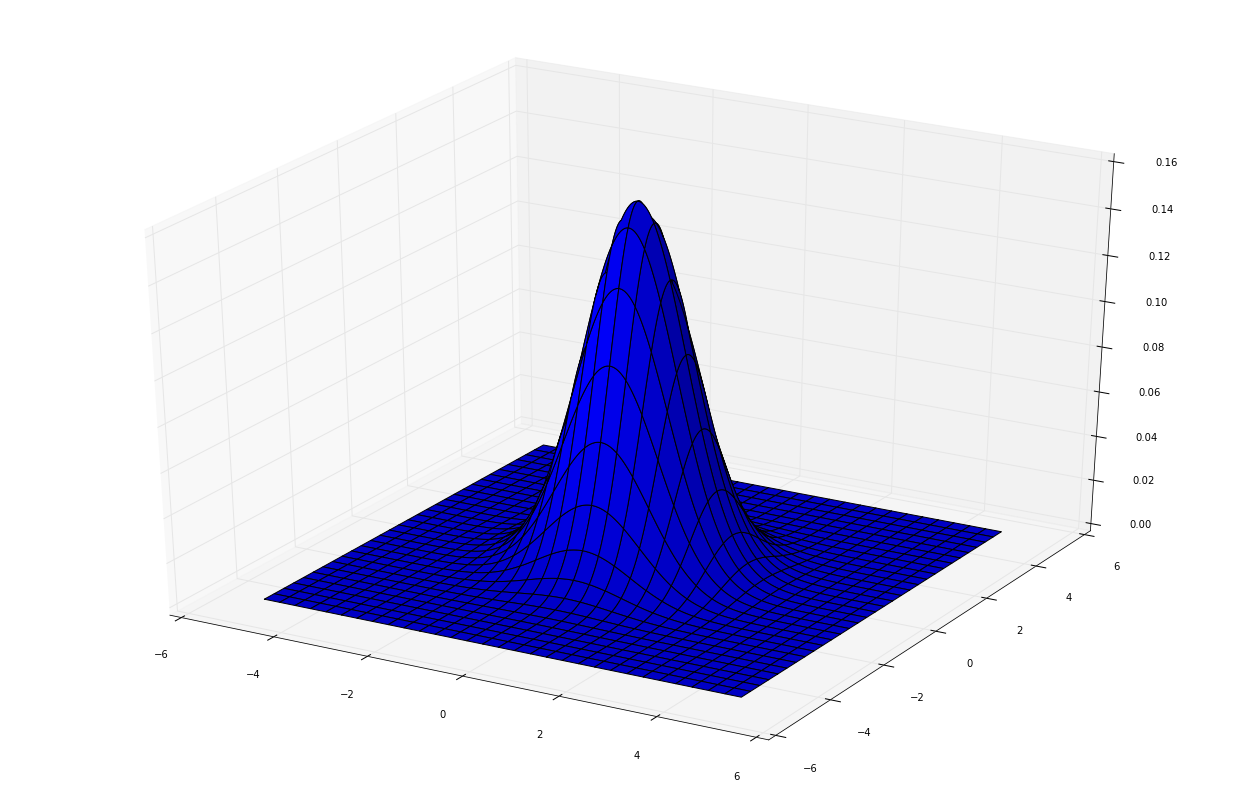

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_partitions = 301;

data_x = np.linspace(-5.0, 5.0, num=x_partitions, retstep=True);
x  = data_x[0]
dx = data_x[1];

data_y = np.linspace(-5.0, 5.0, num=x_partitions, retstep=True);
y  = data_x[0]
dy = data_x[1];

x, y = np.meshgrid(x, y)
#parameters for 2D normal distribution
sigma = np.ones(2) * 1;
miu   = np.ones(2) * 0.01;
rho = 0.0;

A = 2*np.pi*sigma[0]*sigma[1]*np.sqrt(1-rho**2);
B = 2*(1-rho**2);
C = (x-miu[0])**2 / sigma[0]**2;
D = (y-miu[1])**2 / sigma[1]**2;
E = (2*rho*(x-miu[0])*(y-miu[1])) / (miu[0]*miu[1]);

z = 1 / A * np.exp( -1/B * ( C + D - E ) );

fig = plt.figure(figsize=(22,14), dpi=100)          
ax = fig.gca(projection='3d') 
profile, = ax.plot_surface(x, y, z, antialiased=True)

#profile = ax.plot_surface(x, y, z, antialiased=True)

In [10]:
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# How much we want to advance in time?
# at 30 fps if we want simulate 10 seconds => 30*10
t_seconds = 30 * 10;

partitions = 301;

data_x = np.linspace(-5.0, 5.0, num=partitions, retstep=True);
x  = data_x[0]
dx = data_x[1];

data_y = np.linspace(-5.0, 5.0, num=partitions, retstep=True);
y  = data_x[0]
dy = data_x[1];

x, y = np.meshgrid(x, y)
#parameters for 2D normal distribution
sigma = np.ones(2) * 1;
miu   = np.ones(2) * 0.01;
rho = 0.0;

A = 2*np.pi*sigma[0]*sigma[1]*np.sqrt(1-rho**2);
B = 2*(1-rho**2);
C = (x-miu[0])**2 / sigma[0]**2;
D = (y-miu[1])**2 / sigma[1]**2;
E = (2*rho*(x-miu[0])*(y-miu[1])) / (miu[0]*miu[1]);

u = 1 / A * np.exp( -1/B * ( C + D - E ) );

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

profile = ax.plot_surface(x, y, u, antialiased=True);

def index_at(i, j, dim):
    return dim * i + j - dim - 1;

def animate(i, surface):
    #store the actual state of the array
    u_n = u;
    
    #update array
    for i in range(partitions+1, u.size):
        u[index_at(i)] = u_n[1:] - (c*(dt/dx)) * (u_n[1:] - np.roll(u_n, 1)[1:]);
    
    surface = ax.plot_surface(x, y, u, antialiased=True);
    
    ax.view_init(elev=15., azim=i)

# Animate
anim = animation.FuncAnimation(fig, animate, fargs=(profile,), frames=t_seconds, blit=True)
anim.save('2D_Linear_Convection_Equation_01.mp4', fps=30, writer="ffmpeg", codec="libx264");
plt.close(fig);

[[  1.99979375e-12   1.81824884e-10   6.08172742e-09   7.48352305e-08
    3.38758943e-07   5.64132284e-07   3.45602327e-07   7.78893142e-08
    6.45780044e-09   1.96968546e-10   2.21011389e-12]
 [  1.81824884e-10   1.65318491e-08   5.52961717e-07   6.80415525e-06
    3.08005791e-05   5.12919332e-05   3.14227921e-05   7.08183809e-06
    5.87154960e-07   1.79087384e-08   2.00947574e-10]
 [  6.08172742e-09   5.52961717e-07   1.84956116e-05   2.27587207e-04
    1.03022602e-03   1.71562632e-03   1.05103796e-03   2.36875217e-04
    1.96393163e-05   5.99016277e-07   6.72134827e-09]
 [  7.48352305e-08   6.80415525e-06   2.27587207e-04   2.80044466e-03
    1.26768591e-02   2.11106618e-02   1.29329486e-02   2.91473298e-03
    2.41660414e-04   7.37085339e-06   8.27057204e-08]
 [  3.38758943e-07   3.08005791e-05   1.03022602e-03   1.26768591e-02
    5.73847284e-02   9.55622830e-02   5.85439768e-02   1.31942115e-02
    1.09393164e-03   3.33658690e-05   3.74386532e-07]
 [  5.64132284e-07   5.1291933

In [7]:
# You must have configured ffmpeg in your machine to run the code below
from IPython.display import HTML
video = open("2D_Linear_Convection_Equation_01.mp4", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
HTML(video_tag)